In [2]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

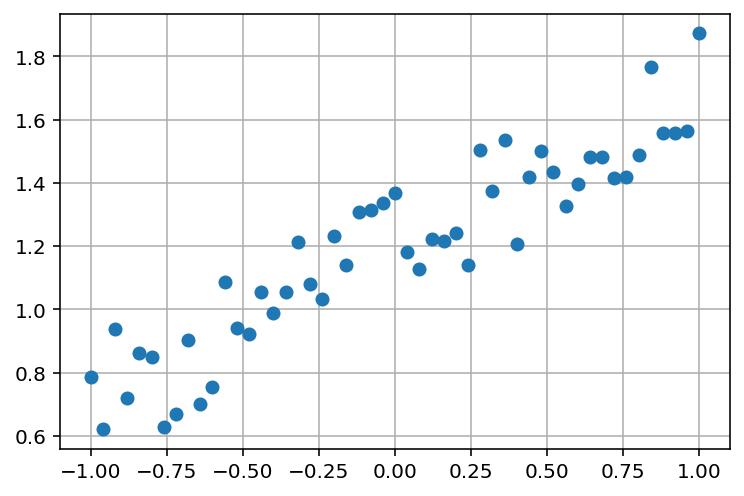

In [3]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

In [4]:
# Weights(control Variable)
w = tf. Variable(-1.0, dtype=tf.float32)
b = tf. Variable(-1.0, dtype=tf.float32)

# Placeholder for Dataset
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Loss function
loss = tf.reduce_sum(tf.square(w * x + b - y)) # sum 대신 mean을 쓰는것이 좋다.

# Numerical Optimizer
lr = 0.01
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [5]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(25):
        if epoch%5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict={x: x_train, y: y_train})
            print(curr_w, curr_b, curr_loss)
            
        sess.run(train, feed_dict={x: x_train, y: y_train})
            
    w_tf_gd, b_tf_gd = sess.run([w, b])

-1.0 -1.0 284.45255
0.3014311 1.1949914 1.1717727
0.44829938 1.1949914 0.6933859
0.46487367 1.1949914 0.6872935
0.4667441 1.1949914 0.687216


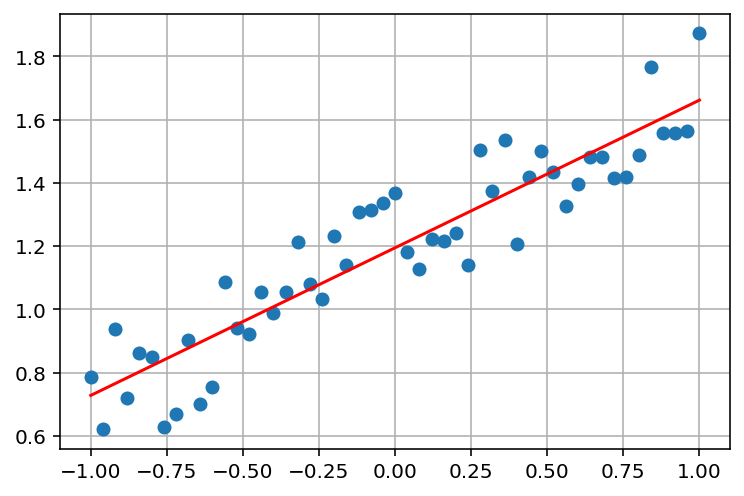

In [6]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, w_tf_gd * x_train + b_tf_gd, 'r-')
plt.grid()
plt.show()